

# Project: Exploratory Data Analysis on Lahman's Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project involves using several Python's built-in libraries to clean data in a variety of ways. I want to use this data to extrapolate a trend in the data. Data was retrieved from http://www.seanlahman.com/baseball-archive/statistics/. This website has data on almost every baseball-related metric dating back to the late 1800s. Since the data incorporates so many different aspects of baseball, I will limit my analysis on the offensive side of baseball. I want to look at the relationship between certain offensive stats and how this relates to aspects of success. This Data Analysis will attempt to answer the following questions:

1. Is there a correlation between Batting Avg and a teams Win Percentage?

2. Do maximum salary players get paid more based on HR's or Batting avg? 

I'd like to preface this analysis by stating the obvious; these variables are obviously related. My goal with this analysis is to show my command of the python programming language to clean and manipulate data into a coherent form. By the end of this analysis, I hope to have a clearer picture regarding these questions. I'm pretty interested in what I will find out, lets get started.

In [129]:
#import all necessary libraries and packages
import pandas as pd
import numpy as np 
import seaborn as sns #better visualizations
from datetime import datetime as dt 
import matplotlib.pyplot as plt 

<a id='wrangling'></a>
## Initial Data Wrangling

### Here, I will import the csv files I am planning to use for this data analysis. 

In [130]:
#create variables associated with csv datafiles
BattingDF = pd.read_csv('Batting.csv')
FieldingDF = pd.read_csv('Fielding.csv')
SalariesDF = pd.read_csv('Salaries.csv')
TeamsDF = pd.read_csv('Teams.csv')
MasterDF = pd.read_csv('Master.csv')
AllStarDF = pd.read_csv('AllstarFull.csv')
AwardsDF = pd.read_csv('AwardsPlayers.csv')

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Is there a correlation between Batting Avg and a teams Win Percentage?


#### The warmup question. This Analysis will only focus on the overall team batting average and the winning percentage. I will look at the individual players batting average in a later part of the analysis.
#### First and foremost, I need to check how the data looks like before I continue with my analysis. 
To answer the first research question, I will need to familiarize myself with the following dataframes: 
TeamsDF


In [131]:
Teams1950 = TeamsDF.copy()[TeamsDF.yearID >= 1950]
#this code only includes years 1950+

In [132]:
Teams1950.head(1)
#getting a feel for the dataframe

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
1183,1950,AL,BOS,BOS,NaN,3,154,77.0,94,60,...,181.0,0.981,Boston Red Sox,Fenway Park II,1344080.0,111,108,BOS,BOS,BOS


In [133]:
Teams1950_dimensions = Teams1950.shape
print("Dimensions for Teams1950 Dataframe:" + str(Teams1950_dimensions))

Dimensions for Teams1950 Dataframe:(1652, 48)


In [134]:
Teams1950.dtypes
#data types for this dataframe

yearID              int64
lgID               object
teamID             object
franchID           object
divID              object
Rank                int64
G                   int64
Ghome             float64
W                   int64
L                   int64
DivWin             object
WCWin              object
LgWin              object
WSWin              object
R                   int64
AB                  int64
H                   int64
2B                  int64
3B                  int64
HR                  int64
BB                  int64
SO                float64
SB                float64
CS                float64
HBP               float64
SF                float64
RA                  int64
ER                  int64
ERA               float64
CG                  int64
SHO                 int64
SV                  int64
IPouts              int64
HA                  int64
HRA                 int64
BBA                 int64
SOA                 int64
E                   int64
DP          

In [135]:
Teams1950.isnull().sum()
#This code sums up the null values in each column of the dataframe

yearID               0
lgID                 0
teamID               0
franchID             0
divID              334
Rank                 0
G                    0
Ghome                0
W                    0
L                    0
DivWin             362
WCWin              998
LgWin               28
WSWin               28
R                    0
AB                   0
H                    0
2B                   0
3B                   0
HR                   0
BB                   0
SO                   0
SB                   0
CS                   8
HBP               1142
SF                1142
RA                   0
ER                   0
ERA                  0
CG                   0
SHO                  0
SV                   0
IPouts               0
HA                   0
HRA                  0
BBA                  0
SOA                  0
E                    0
DP                   0
FP                   0
name                 0
park                 0
attendance           0
BPF        

In [136]:
pd.options.mode.chained_assignment = None
#Takes out the warning message

Teams1950['BA'] = Teams1950['H']/(Teams1950['AB'])
Teams1950['Win_Percentage'] = Teams1950['W'] / Teams1950['G']
#doing it this way creates the columns inplace. No need to 
#create an entirely new dataframe

Teams1950.head(1)#successfully created

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,BA,Win_Percentage
1183,1950,AL,BOS,BOS,NaN,3,154,77.0,94,60,...,Boston Red Sox,Fenway Park II,1344080.0,111,108,BOS,BOS,BOS,0.301849,0.61039


In [137]:
Teams1950.isnull().sum()
#No null values!

yearID               0
lgID                 0
teamID               0
franchID             0
divID              334
Rank                 0
G                    0
Ghome                0
W                    0
L                    0
DivWin             362
WCWin              998
LgWin               28
WSWin               28
R                    0
AB                   0
H                    0
2B                   0
3B                   0
HR                   0
BB                   0
SO                   0
SB                   0
CS                   8
HBP               1142
SF                1142
RA                   0
ER                   0
ERA                  0
CG                   0
SHO                  0
SV                   0
IPouts               0
HA                   0
HRA                  0
BBA                  0
SOA                  0
E                    0
DP                   0
FP                   0
name                 0
park                 0
attendance           0
BPF        

In [138]:
Teams1950['Win_Percentage'].describe()

count    1652.000000
mean        0.499425
std         0.072701
min         0.248447
25%         0.448052
50%         0.500000
75%         0.552147
max         0.716049
Name: Win_Percentage, dtype: float64

In [139]:
Teams1950['BA'].describe()

count    1652.000000
mean        0.258826
std         0.012762
min         0.214124
25%         0.250261
50%         0.259293
75%         0.267136
max         0.301849
Name: BA, dtype: float64

In [140]:
def correlation(x,y):
    std_x = (x-x.mean())/x.std(ddof=0)
    std_y = (y-y.mean())/y.std(ddof=0)
    return (std_x*std_y).mean()

Win_Percentage = Teams1950['Win_Percentage']
Batting_Avg = Teams1950['BA']

print('Correlation between Batting Avg and Win Percentage since 1950')
print(correlation(Win_Percentage,Batting_Avg))

Correlation between Batting Avg and Win Percentage since 1950
0.42251926300670534


Populating the interactive namespace from numpy and matplotlib


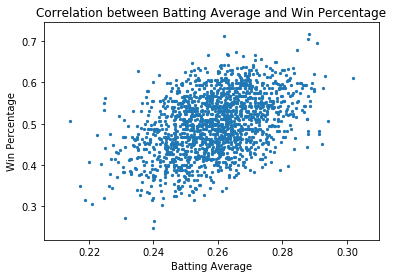

In [141]:
%pylab inline
plt.scatter(Batting_Avg,Win_Percentage,s=5)
plt.xlabel('Batting Average')
plt.ylabel('Win Percentage')
plt.title('Correlation between Batting Average and Win Percentage')
plt.show()

### Research Question 2: Do maximum salary players get paid more based on HR's or Batting avg?
##### This question requires that I familarize myself with the following datafiles:
- BattingDF
- SalariesDF

In [142]:
print("Dimensions of BattingDF:" + str(BattingDF.shape))
BattingDF.head(1)

Dimensions of BattingDF:(102816, 22)


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN


In [143]:
print("Dimensions of SalariesDF:" + str(SalariesDF.shape))
SalariesDF.head(1)

Dimensions of SalariesDF:(26428, 5)


,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000


I notice here that the dataframe containing the salary information starts at 1985 while the dataframe containing the batting information starts all the way back in 1871. I'll double check min value for the year in the cell below.

In [144]:
batting_df_min_year = BattingDF['yearID'].min()
salaries_df_min_year = SalariesDF['yearID'].min()
print("The batting Dataframe dates all the way back to {}".format(batting_df_min_year))
print("The salary Dataframe dates all the way back to {}".format(salaries_df_min_year))
"""This is more than 100 years apart!"""

The batting Dataframe dates all the way back to 1871
The salary Dataframe dates all the way back to 1985


'This is more than 100 years apart!'

In [145]:
Batting1985 = BattingDF[BattingDF['yearID'] >= 1985]
#This code only includes years from 1985 and on.
Batting1985['yearID'].min()#check

1985

In [146]:
Batting1985.head(1)
#I can see here it eliminates over 60,000 rows.

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
62239,aasedo01,1985,1,BAL,AL,54,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
print(SalariesDF.dtypes)
"""yearID and salary contain interger values"""

yearID       int64
teamID      object
lgID        object
playerID    object
salary       int64
dtype: object


'yearID and salary contain interger values'

In [148]:
SalariesDF.isnull().sum()#no null values

yearID      0
teamID      0
lgID        0
playerID    0
salary      0
dtype: int64

In [149]:
SalariesDF.describe()

,yearID,salary
count,26428.000000,2.642800e+04
mean,2000.878727,2.085634e+06
std,8.909314,3.455348e+06
min,1985.000000,0.000000e+00
25%,1994.000000,2.947020e+05
50%,2001.000000,5.500000e+05
75%,2009.000000,2.350000e+06
max,2016.000000,3.300000e+07


Populating the interactive namespace from numpy and matplotlib


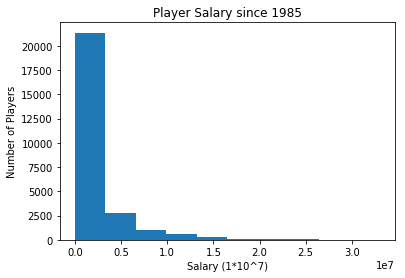

In [150]:
%pylab inline
plt.hist(SalariesDF['salary'])
plt.xlabel('Salary (1*10^7)')
plt.ylabel('Number of Players')
plt.title('Player Salary since 1985')
plt.show()

I can see here that a large chunk of players fall below the 550,000 salary range. This histogram shows a positive (right) skew and is a visual representation of the descriptive statistics shown above. The histogram is very dense around the lower values. 
I am curious how the mean salary value varies over time.

Populating the interactive namespace from numpy and matplotlib


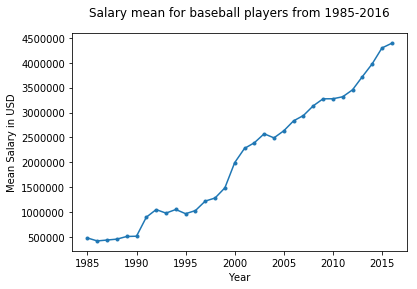

In [151]:
%pylab inline
salary_mean = SalariesDF.groupby(['yearID'])['salary'].mean()
plt.plot(salary_mean,marker='.')
plt.title('Salary mean for baseball players from 1985-2016' ).set_position([.5, 1.05])
plt.xlabel('Year')
plt.ylabel('Mean Salary in USD')
plt.show()

Populating the interactive namespace from numpy and matplotlib


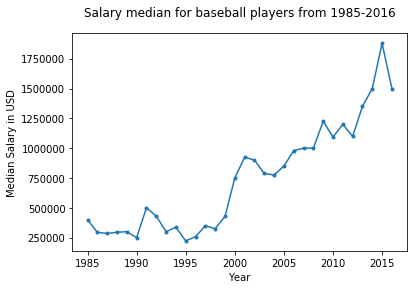

In [152]:
%pylab inline
salary_median = SalariesDF.groupby(['yearID'])['salary'].median()
plt.plot(salary_median,marker='.')
plt.title('Salary median for baseball players from 1985-2016' ).set_position([.5, 1.05])
plt.xlabel('Year')
plt.ylabel('Median Salary in USD')
plt.show()

I am curious as to who the highest paid athletes are. I want to return the players commanding the highest salary since 1985.

In [153]:
max_salary = SalariesDF.groupby('yearID').salary.max()
#returns a series with max salary in each year
max_salary = max_salary.to_frame()#turn this into a dataframe
max_salary.reset_index(inplace=True)#reset index
max_salary.head()

,yearID,salary
0,1985,2130300
1,1986,2800000
2,1987,2127333
3,1988,2340000
4,1989,2766667


In [154]:
max_salary.shape #32 rows of data

(32, 2)

In [155]:
Max_salary = max_salary.merge(SalariesDF,on=['yearID','salary'],how='inner')
Max_salary.head(1)#it works!

,yearID,salary,teamID,lgID,playerID
0,1985,2130300,PHI,NL,schmimi01


In [156]:
max_salary_count = Max_salary.groupby('playerID').count()
max_salary_count #some playerID's are associated with multiple years. 

,yearID,salary,teamID,lgID
playerID,,,,
belleal01,2,2,2,2
bonilbo01,3,3,3,3
brownke01,1,1,1,1
fieldce01,2,2,2,2
fostege01,1,1,1,1
giambja01,1,1,1,1
greinza01,1,1,1,1
hershor01,1,1,1,1
kershcl01,2,2,2,2


In [157]:
max_salary_count.shape
#16 different players accounting for the 32 years of data

(16, 4)

Next I want the batting statistics associated with these players... To do so i'll merge the above dataframe with the batting dataframe on the playerID and yearID column variables. This ensures the correct player and the appropriate year are merged into one dataframe.

In [158]:
Player_stats_and_salaries = Max_salary.merge(Batting1985,on=['playerID','yearID'],
                                             how='inner')
#merge the two dataframes on yearID and playerID

Player_stats_and_salaries.drop(['lgID_x','lgID_y','stint','2B','3B','SB','CS','BB','SO','IBB','HBP'
                                ,'SH','SF','GIDP'],axis=1,
                              inplace=True)  
#drop irrelevant columns for this analysis

In [159]:
Player_stats_and_salaries.shape

(35, 11)

In [160]:
player_stats_and_salaries_count = Player_stats_and_salaries.groupby('playerID').count()
player_stats_and_salaries_count.shape 


(16, 10)

In [161]:
Player_stats_and_salaries['yearID'].value_counts()


1986    2
1996    2
1998    2
2016    1
2015    1
1987    1
1988    1
1989    1
1990    1
1991    1
1992    1
1993    1
1994    1
1995    1
1997    1
1999    1
2000    1
2001    1
2002    1
2003    1
2004    1
2005    1
2006    1
2007    1
2008    1
2009    1
2010    1
2011    1
2012    1
2013    1
2014    1
1985    1
Name: yearID, dtype: int64

In [162]:
Max_salary_player_yearly = Player_stats_and_salaries.groupby(['playerID',
                                                              'yearID']).sum()
#Groupby playerID and yearID and sum the batting statistics.
#Then create the batting average column here:
Max_salary_player_yearly['BA'] = Max_salary_player_yearly['H']/Max_salary_player_yearly['AB']
#check if it has been added
Max_salary_player_yearly.shape
#back to 32 rows!

(32, 8)

In [163]:
Max_salary_player_yearly['HR'].describe()

count    32.000000
mean     24.843750
std      16.445628
min       0.000000
25%      14.000000
50%      29.000000
75%      35.000000
max      57.000000
Name: HR, dtype: float64

In [164]:
Max_salary_player_yearly['BA'].describe()

count    32.000000
mean      0.257155
std       0.054852
min       0.075758
25%       0.243421
50%       0.271127
75%       0.294008
max       0.320661
Name: BA, dtype: float64

In [165]:
hr_count = Max_salary_player_yearly['HR'].value_counts()
hr_count.sort_index(axis=0,inplace=True)
hr_count
#returns a pandas series with sum of homeruns and counts within this DF.

0     4
1     1
3     1
7     1
14    2
16    1
17    1
18    1
19    1
20    1
22    1
28    1
30    3
31    1
33    1
34    1
35    3
37    1
39    1
43    1
47    1
48    1
52    1
57    1
Name: HR, dtype: int64

'A large proportion of this dataframe has 0 values, I need to investigate'

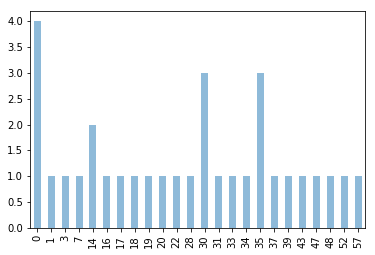

In [166]:
hr_count.plot(kind='bar',alpha=0.5)
"""A large proportion of this dataframe has 0 values, I need to investigate"""

In [167]:
for i,j in hr_count.iteritems():
    if i < 10:
        print("Home Runs:" + str(i))
        print("Count:" + str(j))
    else:
        break

Home Runs:0
Count:4
Home Runs:1
Count:1
Home Runs:3
Count:1
Home Runs:7
Count:1


In [168]:
print (Max_salary_player_yearly[Max_salary_player_yearly['HR'] < 10])

                    salary    G   AB   R    H  HR   RBI        BA
playerID  yearID                                                 
brownke01 2000    15714286   33   66   2    5   0   3.0  0.075758
greinza01 2014    26000000   32   60   5   12   1   3.0  0.200000
hershor01 1989     2766667   35   77   4   14   0   2.0  0.181818
kershcl01 2015    32571000   34   71   2    9   0   2.0  0.126761
          2016    33000000   23   46   2    8   0   3.0  0.173913
rodrial01 2013    29000000   44  156  21   38   7  19.0  0.243590
smithoz01 1988     2340000  153  575  80  155   3  51.0  0.269565


In [169]:
top_offensive_salaries = Player_stats_and_salaries.copy()
#create a copy

In [170]:
top_offensive_salaries.loc[top_offensive_salaries['playerID'] == 'hershor01']
#index 5 corresponds to this playerID

,yearID,salary,teamID_x,playerID,teamID_y,G,AB,R,H,HR,RBI
5,1989,2766667,LAN,hershor01,LAN,35,77,4,14,0,2.0


In [171]:
top_offensive_salaries.drop(top_offensive_salaries.index[5]
                               ,inplace=True,axis=0)
top_offensive_salaries.reset_index(drop=True,inplace=True)
#remove the corresponding row and reinitialize the index

In [172]:
top_offensive_salaries.loc[top_offensive_salaries['playerID'] 
                              == 'brownke01']
#Index 17 corresponds to playerID = 'brownke01'

,yearID,salary,teamID_x,playerID,teamID_y,G,AB,R,H,HR,RBI
17,2000,15714286,LAN,brownke01,LAN,33,66,2,5,0,3.0


In [173]:
top_offensive_salaries.drop(
    top_offensive_salaries.index[17],inplace=True,axis=0)
top_offensive_salaries.reset_index(drop=True,inplace=True)
#drop the index corresponding to 'brownke01'

In [174]:
top_offensive_salaries.loc[top_offensive_salaries['playerID'] 
                              == 'greinza01']
#Index 30 = 'greinza01'

,yearID,salary,teamID_x,playerID,teamID_y,G,AB,R,H,HR,RBI
30,2014,26000000,LAN,greinza01,LAN,32,60,5,12,1,3.0


In [175]:
top_offensive_salaries.drop(top_offensive_salaries.index[30],inplace=True,axis=0)
top_offensive_salaries.reset_index(drop=True,inplace=True)
#drop index row 30 and reset index

In [176]:
top_offensive_salaries.loc[top_offensive_salaries['playerID'] 
                              == 'kershcl01']

,yearID,salary,teamID_x,playerID,teamID_y,G,AB,R,H,HR,RBI
30,2015,32571000,LAN,kershcl01,LAN,34,71,2,9,0,2.0
31,2016,33000000,LAD,kershcl01,LAN,23,46,2,8,0,3.0


In [177]:
top_offensive_salaries.drop(top_offensive_salaries.index[30:32],
                               inplace=True,axis=0)
top_offensive_salaries.reset_index(drop=True,inplace=True)
top_offensive_salaries.shape
#5 rows of data have been removed from this dataframe.
#Lets check if there are still 16 different players

(30, 11)

In [178]:
Max_batters = top_offensive_salaries.groupby(['playerID','yearID']).sum()
Max_batters['BA'] = Max_batters['H']/Max_batters['AB']
#Group the trimmed dataframe and create the batting average column again

In [179]:
Max_HR = Max_batters['HR']
Max_salary = Max_batters['salary']

print('Correlation between HR and salaries for max players')
print(correlation(Max_HR,Max_salary))

Correlation between HR and salaries for max players
0.15649957099001505


In [180]:
Max_BA = Max_batters['BA']

print('Correlation between Batting Avg and salaries for max players')
print(correlation(Max_BA,Max_salary))

Correlation between Batting Avg and salaries for max players
0.32402466262151514


In [181]:
print (Max_batters['HR'].describe())
print(' ')
print (Max_salary_player_yearly['HR'].describe())

count    27.000000
mean     29.407407
std      13.565395
min       3.000000
25%      18.500000
50%      30.000000
75%      36.000000
max      57.000000
Name: HR, dtype: float64
 
count    32.000000
mean     24.843750
std      16.445628
min       0.000000
25%      14.000000
50%      29.000000
75%      35.000000
max      57.000000
Name: HR, dtype: float64


In [182]:
print (Max_batters['BA'].describe())
print(' ')
print (Max_salary_player_yearly['BA'].describe())

count    27.000000
mean      0.276693
std       0.025709
min       0.225352
25%       0.258528
50%       0.276139
75%       0.297455
max       0.320661
Name: BA, dtype: float64
 
count    32.000000
mean      0.257155
std       0.054852
min       0.075758
25%       0.243421
50%       0.271127
75%       0.294008
max       0.320661
Name: BA, dtype: float64


In [183]:
Max_batters.loc[Max_batters['HR'].idxmax()]
#Alex Rodriguez in 2002 had the max HR for this Dataframe.

salary    2.200000e+07
G         1.620000e+02
AB        6.240000e+02
R         1.250000e+02
H         1.870000e+02
HR        5.700000e+01
RBI       1.420000e+02
BA        2.996795e-01
Name: (rodrial01, 2002), dtype: float64

In [184]:
Max_batters.loc[Max_batters['BA'].idxmax()]
#Alex Rodriguez in 2005 had the max Batting Average for this DF.

salary    2.600000e+07
G         1.620000e+02
AB        6.050000e+02
R         1.240000e+02
H         1.940000e+02
HR        4.800000e+01
RBI       1.300000e+02
BA        3.206612e-01
Name: (rodrial01, 2005), dtype: float64

In [185]:
Batting2002 = BattingDF.copy()[BattingDF.yearID == 2002]#batting stats for 2002
Batting2005 = BattingDF.copy()[BattingDF.yearID == 2005]#batting stats for 2005
#I prefer to keep them separate

In [186]:
Fielding2002 = FieldingDF[FieldingDF['yearID']==2002]
Fielding2005 = FieldingDF[FieldingDF['yearID']==2005]
"""I want to trim the salary and field dataframes 
down a bit so I don't need to clean data as much later"""
Salaries2002 = SalariesDF[SalariesDF['yearID']==2002]
Salaries2005 = SalariesDF[SalariesDF['yearID']==2005]

In [187]:
Batting2002.dtypes

playerID     object
yearID        int64
stint         int64
teamID       object
lgID         object
G             int64
AB            int64
R             int64
H             int64
2B            int64
3B            int64
HR            int64
RBI         float64
SB          float64
CS          float64
BB            int64
SO          float64
IBB         float64
HBP         float64
SH          float64
SF          float64
GIDP        float64
dtype: object

In [188]:
Batting2005.dtypes# check data types

playerID     object
yearID        int64
stint         int64
teamID       object
lgID         object
G             int64
AB            int64
R             int64
H             int64
2B            int64
3B            int64
HR            int64
RBI         float64
SB          float64
CS          float64
BB            int64
SO          float64
IBB         float64
HBP         float64
SH          float64
SF          float64
GIDP        float64
dtype: object

In [189]:
print(Batting2002.shape)
print(Batting2005.shape)#dimensions of these dataframes

(1319, 22)
(1330, 22)


In [190]:
print(Batting2002.playerID.unique().shape)
print(Batting2005.playerID.unique().shape)#unique playerID's, 

(1218,)
(1237,)


In [191]:
print(Batting2002.duplicated().sum())
print(Batting2005.duplicated().sum())#prints sum of duplicate rows

0
0


In [192]:
Batting2002[Batting2002.duplicated(['playerID'],keep=False)]
#code prints out duplicate rows based on playerID values

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
81980,agbaybe01,2002,1,COL,NL,48,117,10,24,5,...,19.0,1.0,0.0,10,35.0,0.0,0.0,0.0,1.0,4.0
81981,agbaybe01,2002,2,BOS,AL,13,37,5,11,1,...,8.0,0.0,0.0,6,5.0,1.0,0.0,0.0,0.0,1.0
81992,alomasa02,2002,1,CHA,AL,51,167,21,48,10,...,25.0,0.0,0.0,5,14.0,0.0,1.0,1.0,2.0,5.0
81993,alomasa02,2002,2,COL,NL,38,116,8,31,4,...,12.0,0.0,0.0,4,19.0,0.0,0.0,0.0,0.0,6.0
82068,beverja01,2002,1,CLE,AL,4,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
82069,beverja01,2002,2,DET,AL,3,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
82078,bocachi01,2002,1,LAN,NL,49,65,12,14,3,...,9.0,1.0,1.0,5,19.0,0.0,0.0,0.0,0.0,1.0
82079,bocachi01,2002,2,DET,AL,34,103,14,23,4,...,8.0,2.0,2.0,5,22.0,0.0,0.0,1.0,0.0,2.0
82085,borbope02,2002,1,TOR,AL,16,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
82086,borbope02,2002,2,HOU,NL,56,3,0,0,0,...,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0


In [193]:
Batting2002[Batting2002['stint'] > 1].shape

(101, 22)

In [194]:
Batting_stats_2002 = Batting2002.groupby(['playerID','yearID','teamID']).sum()
Batting_stats_2002.reset_index(inplace=True)#reset index
Batting_stats_2002.drop(['stint','GIDP','SF','SH','IBB','2B','3B','SB','CS','BB','SO','HBP'],axis=1,inplace=True)
print("Dimensions of this dataframe:" + str(Batting_stats_2002.shape))
Batting_stats_2002.head(1)

Dimensions of this dataframe:(1319, 9)


,playerID,yearID,teamID,G,AB,R,H,HR,RBI
0,abbotpa01,2002,SEA,7,0,0,0,0,0.0


In [195]:
Batting2005[Batting2005.duplicated(['playerID'],keep=False)]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
86006,amezaal01,2005,1,COL,NL,2,3,1,1,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
86007,amezaal01,2005,2,PIT,NL,3,3,1,0,0,...,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0
86020,astacpe01,2005,1,TEX,AL,12,1,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
86021,astacpe01,2005,2,SDN,NL,12,16,1,1,0,...,1.0,0.0,0.0,1,5.0,0.0,0.0,5.0,0.0,2.0
86037,baldwja01,2005,1,BAL,AL,12,1,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
86038,baldwja01,2005,2,TEX,AL,8,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
86039,baldwja01,2005,3,BAL,AL,8,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
86060,bellhma01,2005,1,BOS,AL,85,283,41,61,20,...,28.0,3.0,0.0,49,109.0,1.0,0.0,0.0,3.0,4.0
86061,bellhma01,2005,2,NYA,AL,9,17,2,2,0,...,2.0,0.0,0.0,3,3.0,0.0,0.0,0.0,0.0,0.0
86079,bigbila01,2005,1,BAL,AL,67,206,22,51,9,...,21.0,3.0,3.0,21,49.0,1.0,0.0,5.0,2.0,2.0


In [196]:
Batting2005[Batting2005['stint'] > 1].shape

(93, 22)

In [197]:
Batting_stats_2005 = Batting2005.groupby(['playerID','yearID','teamID']).sum()
Batting_stats_2005.reset_index(inplace=True)#reset index
Batting_stats_2005.drop(['stint','GIDP','SF','SH','IBB','2B','3B','SB','CS','BB','SO','HBP'],axis=1,inplace=True)
print("Dimensions of this dataframe:" + str(Batting_stats_2005.shape))
Batting_stats_2005.head(1)

Dimensions of this dataframe:(1329, 9)


,playerID,yearID,teamID,G,AB,R,H,HR,RBI
0,abernbr01,2005,MIN,24,67,5,16,1,6.0


In [198]:
Batting_stats_2005.playerID.unique().shape

(1237,)

In [199]:
Fielding2002.drop(['InnOuts','PO','A','E','DP','PB','WP','SB','CS','ZR','stint','lgID','G','GS'],axis=1,inplace=True)
#drop columns unnecessary for this analysis
Fielding2005.drop(['InnOuts','PO','A','E','DP','PB','WP','SB','CS','ZR','stint','lgID','G','GS'],axis=1,inplace=True)

In [200]:
print(Fielding2002.dtypes)#check data types
print("--------------------")
print(Fielding2005.dtypes)

playerID    object
yearID       int64
teamID      object
POS         object
dtype: object
--------------------
playerID    object
yearID       int64
teamID      object
POS         object
dtype: object


In [201]:
print(Salaries2002.dtypes)#check data types
print("--------------------")
print(Salaries2005.dtypes)

yearID       int64
teamID      object
lgID        object
playerID    object
salary       int64
dtype: object
--------------------
yearID       int64
teamID      object
lgID        object
playerID    object
salary       int64
dtype: object


In [202]:
print("Number of unique playerID's in Fielding2002 Dataframe:" + str(Fielding2002.playerID.unique().shape))
print("Number of unique playerID's in Fielding2005 Dataframe:" + str(Fielding2005.playerID.unique().shape))
print("Number of unique playerID's in Salaries2002 Dataframe:" + str(Salaries2002.playerID.unique().shape))
print("Number of unique playerID's in Salaries2005 Dataframe:" + str(Salaries2005.playerID.unique().shape))


Number of unique playerID's in Fielding2002 Dataframe:(1212,)
Number of unique playerID's in Fielding2005 Dataframe:(1225,)
Number of unique playerID's in Salaries2002 Dataframe:(846,)
Number of unique playerID's in Salaries2005 Dataframe:(831,)


In [203]:
batting_pos_2002 = Batting_stats_2002.merge(Fielding2002,on=['playerID','yearID','teamID'])
batting_pos_2005 = Batting_stats_2005.merge(Fielding2005,on=['playerID','yearID','teamID'])

print("2002 dataframe dimensions:" + str(batting_pos_2002.shape))
print("2005 dataframe dimensions:"+str(batting_pos_2005.shape))

2002 dataframe dimensions:(1713, 10)
2005 dataframe dimensions:(1688, 10)


In [204]:
print(batting_pos_2002.playerID.unique().shape)
print(batting_pos_2005.playerID.unique().shape)

(1212,)
(1225,)


In [205]:
batting_pos_salary_2002 = batting_pos_2002.merge(Salaries2002,on=['playerID','yearID','teamID'],
                                        how='inner')
batting_pos_salary_2005 = batting_pos_2005.merge(Salaries2005,on=['playerID','yearID','teamID'],
                                        how='inner')

In [206]:
print(batting_pos_salary_2002.shape)
print(batting_pos_salary_2005.shape)

(1077, 12)
(1033, 12)


In [207]:
print("2002 Dataframe unique playerIDs:" +str(batting_pos_salary_2002.playerID.unique().shape))
print("2005 Dataframe unique playerIDs:" +str(batting_pos_salary_2005.playerID.unique().shape))

2002 Dataframe unique playerIDs:(801,)
2005 Dataframe unique playerIDs:(792,)


In [208]:
batting_pos_salary_2002.dtypes#check data

playerID     object
yearID        int64
teamID       object
G             int64
AB            int64
R             int64
H             int64
HR            int64
RBI         float64
POS          object
lgID         object
salary        int64
dtype: object

In [209]:
batting_pos_salary_2005.dtypes

playerID     object
yearID        int64
teamID       object
G             int64
AB            int64
R             int64
H             int64
HR            int64
RBI         float64
POS          object
lgID         object
salary        int64
dtype: object

In [210]:
batting_pos_salary_2002.isnull().sum()
#check for null values

playerID    0
yearID      0
teamID      0
G           0
AB          0
R           0
H           0
HR          0
RBI         0
POS         0
lgID        0
salary      0
dtype: int64

In [211]:
batting_pos_salary_2005.isnull().sum()
#check for null values

playerID    0
yearID      0
teamID      0
G           0
AB          0
R           0
H           0
HR          0
RBI         0
POS         0
lgID        0
salary      0
dtype: int64

In [212]:
print(str(batting_pos_salary_2002.duplicated().sum())+" duplicate rows in 2002 dataframe")
print(str(batting_pos_salary_2005.duplicated().sum())+" duplicate rows in 2005 dataframe")


0 duplicate rows in 2002 dataframe
0 duplicate rows in 2005 dataframe


In [213]:
batting_pos_salary_2002[batting_pos_salary_2002.duplicated(['playerID'],keep=False)].head(10)

,playerID,yearID,teamID,G,AB,R,H,HR,RBI,POS,lgID,salary
11,alicelu01,2002,KCA,94,237,28,54,1,23.0,1B,AL,800000
12,alicelu01,2002,KCA,94,237,28,54,1,23.0,2B,AL,800000
13,alicelu01,2002,KCA,94,237,28,54,1,23.0,3B,AL,800000
14,alicelu01,2002,KCA,94,237,28,54,1,23.0,OF,AL,800000
15,alicelu01,2002,KCA,94,237,28,54,1,23.0,SS,AL,800000
36,baergca01,2002,BOS,73,182,17,52,2,19.0,2B,AL,700000
37,baergca01,2002,BOS,73,182,17,52,2,19.0,3B,AL,700000
44,barajro01,2002,ARI,70,154,12,36,3,23.0,1B,NL,215000
45,barajro01,2002,ARI,70,154,12,36,3,23.0,C,NL,215000
47,barremi01,2002,MON,117,376,41,99,12,49.0,1B,NL,1150000


In [214]:
batting_pos_salary_2005[batting_pos_salary_2005.duplicated(['playerID'],keep=False)].head(10)

,playerID,yearID,teamID,G,AB,R,H,HR,RBI,POS,lgID,salary
7,alfoned01,2005,SFN,109,368,36,102,2,43.0,2B,NL,7500000
8,alfoned01,2005,SFN,109,368,36,102,2,43.0,3B,NL,7500000
23,aurilri01,2005,CIN,114,426,61,120,14,68.0,2B,NL,600000
24,aurilri01,2005,CIN,114,426,61,120,14,68.0,3B,NL,600000
25,aurilri01,2005,CIN,114,426,61,120,14,68.0,SS,NL,600000
26,ausmubr01,2005,HOU,134,387,35,100,3,47.0,2B,NL,3000000
27,ausmubr01,2005,HOU,134,387,35,100,3,47.0,C,NL,3000000
28,ausmubr01,2005,HOU,134,387,35,100,3,47.0,SS,NL,3000000
36,barajro01,2005,TEX,120,410,53,104,21,60.0,1B,AL,1850000
37,barajro01,2005,TEX,120,410,53,104,21,60.0,C,AL,1850000


In [215]:
print(batting_pos_salary_2002.duplicated().sum())
print(batting_pos_salary_2005.duplicated().sum())

0
0


In [216]:
bat_2002_df = batting_pos_salary_2002.drop_duplicates(subset='playerID',keep='first')
bat_2005_df = batting_pos_salary_2005.drop_duplicates(subset='playerID',keep='first')
print("Number of duplicate playerID's: " + str(bat_2002_df.playerID.duplicated().sum()))
print("Number of duplicate playerID's: " + str(bat_2005_df.playerID.duplicated().sum()))

Number of duplicate playerID's: 0
Number of duplicate playerID's: 0


In [217]:
print(bat_2002_df.shape)
print(bat_2005_df.shape)

(801, 12)
(792, 12)


In [218]:
no_pitcher_2002_df = bat_2002_df[bat_2002_df['POS'] != 'P']
no_pitcher_2005_df = bat_2005_df[bat_2005_df['POS'] != 'P']

In [219]:
no_pitcher_2002_df['BA'] = no_pitcher_2002_df['H']/no_pitcher_2002_df['AB']
no_pitcher_2005_df['BA'] = no_pitcher_2005_df['H']/no_pitcher_2005_df['AB']

In [220]:
no_pitcher_2002_df['HR'].describe()

count    422.000000
mean      10.547393
std       10.621825
min        0.000000
25%        2.250000
50%        7.000000
75%       16.000000
max       57.000000
Name: HR, dtype: float64

In [221]:
no_pitcher_2002_df[no_pitcher_2002_df['playerID'] == 'rodrial01']

,playerID,yearID,teamID,G,AB,R,H,HR,RBI,POS,lgID,salary,BA
831,rodrial01,2002,TEX,162,624,125,187,57,142.0,SS,AL,22000000,0.299679


In [222]:
def standardize_column(column):#standardize variables by distance from stdevs
    return (column - column.mean()) / column.std()

sample_batting_hr_2002 = standardize_column(no_pitcher_2002_df['HR'])
#standardize column in smaller sample population.


sample_batting_hr_2002[831]

4.3733169273161936

In [223]:
HR_2002 = no_pitcher_2002_df['HR']
salary_2002 = no_pitcher_2002_df['salary']
BA_2002 = no_pitcher_2002_df['BA']
print("correlation between home runs and salary in 2002:" + str(correlation(HR_2002,salary_2002)))

print("correlation between batting average and salary in 2002:" + str(correlation(BA_2002,salary_2002)))
      
      

correlation between home runs and salary in 2002:0.5888516469177194
correlation between batting average and salary in 2002:0.32616570408862966


Populating the interactive namespace from numpy and matplotlib


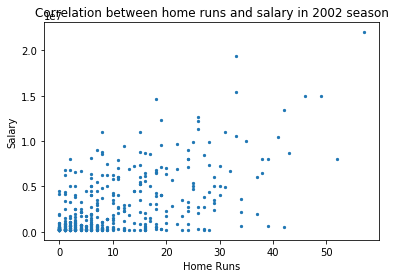

In [224]:
%pylab inline
plt.scatter(HR_2002,salary_2002,s=5)
plt.xlabel('Home Runs')
plt.ylabel('Salary')
plt.title('Correlation between home runs and salary in 2002 season')
plt.show()

In [225]:
no_pitcher_2005_df[no_pitcher_2005_df['playerID'] == 'rodrial01']

,playerID,yearID,teamID,G,AB,R,H,HR,RBI,POS,lgID,salary,BA
805,rodrial01,2005,NYA,162,605,124,194,48,130.0,3B,AL,26000000,0.320661


In [226]:
no_pitcher_2005_df['BA'].describe()

count    413.000000
mean       0.256736
std        0.047502
min        0.000000
25%        0.240918
50%        0.263323
75%        0.284091
max        0.500000
Name: BA, dtype: float64

In [227]:
sample_batting_BA_2005 = standardize_column(no_pitcher_2005_df['BA'])
#standardize column in smaller sample population.


sample_batting_BA_2005[805]

1.345721607824405

In [228]:
HR_2005 = no_pitcher_2005_df['HR']
salary_2005 = no_pitcher_2005_df['salary']
BA_2005 = no_pitcher_2005_df['BA']
print("correlation between home runs and salary in 2005:" + str(correlation(HR_2005,salary_2005)))

print("correlation between batting average and salary in 2005:" + str(correlation(BA_2005,salary_2005)))
      
      

correlation between home runs and salary in 2005:0.45611352159330193
correlation between batting average and salary in 2005:0.21009487492782403


Populating the interactive namespace from numpy and matplotlib


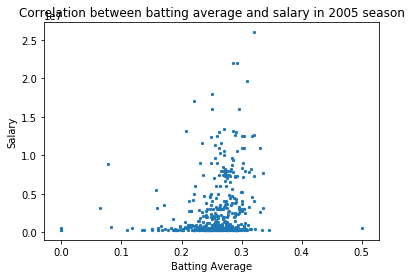

In [229]:
%pylab inline
plt.scatter(BA_2005,salary_2005,s=5)
plt.xlabel('Batting Average')
plt.ylabel('Salary')
plt.title('Correlation between batting average and salary in 2005 season')
plt.show()

<a id='conclusions'></a>
## Conclusions

I had to cut off my analysis because I could go on forever. Baseball, like many other processes in the world, depend on a multitude of variables and constraints. I attempted to narrows certain aspects of the game of baseball down to a few variables. This analysis involved me attempting to show through a systematic process that:

1. There is a correlation between a team's win percentage and salary
2. A player will get paid more if they hit more home runs as opposed to simply hitting the ball.

I started this analysis off very generally and gradually began narrowing it down as I went along. I started with entire teams and the associated win percentages comparing it to team salaries. Doing this ignores the details that go into constructing a team (individual players, management styles, league dynamics). As the analysis progressed, I attempted to focus on individual players and their relationship with salaries. I wanted to use certain baseball metrics as benchmarks for a players success and measured their success by how much money they made. Through my analysis, I came to the conclusion that teams who paid more for their players usually won more and the players who got paid more usually hit multiple home runs. The code I ran on the numbers seem to back this up, but correlation does not mean causation and it couldn't be anymore true in this analysis. 

There are obvious limitations to this analysis that I should point out. For starters, most of my project involved bivariate analysis. I ignored a lot of other factors that pertain to a game of baseball, most notably in this analysis I focused only on one side of the game: offense. There is a whole other aspect of baseball that players get paid for (pitching/defense) that I did not include in this analysis. Also, just within offense itself, there are many layers that are interlaced and effect one another; attempting to focus on one aspect is not the see all end all. Batting average and home runs itself is related to one another. In fact, I could have calculated a correlation matrix from a specific year to test how much each baseball metric affected one another.

I also decided not to analyze any other variables and narrowed it down to just home runs and batting average. If i hadn't narrowed down my variables of choice, I would still be writing a script to analyze all aspects of baseball to this day. That type of analysis is more suited to higher degrees of data analysis such as machine learning. 

This analysis did allow for me the opportunity to play around with datasets through my use of python's built-in libraries (pandas, numpy) and create visualizations as well. I used a few makeshift logical statements to get a better understanding of the dataset. All in all, this was a very fun project and I look forward to making improvements as I continue to delve deeper into data analytics.

In [230]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1